In [1]:
#Import the libraries that we are going to use
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
#Read geographic data as pandas dataframe
geographics = pd.read_csv('geographic.csv')

In [3]:
#Initialize nta dictionary
nta_dictionary = {}
for nta in geographics.columns:
    nta_dictionary[nta] = ''

In [4]:
#Create a dictionary for each NTA with longitude and latitude as values
for nta in nta_dictionary:
    latitude = []
    longitude = [] 
    for i in geographics.loc[:,nta].values:
        if i < 0:
            latitude.append(i)
        elif i > 0:
            longitude.append(i)
    nta_dictionary[nta] = [longitude,latitude]

In [5]:
def nta_graph(nta):
    '''Function to graph the NTA on a scatterplot'''
    plt.scatter(nta_dictionary[nta][0],nta_dictionary[nta][1])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

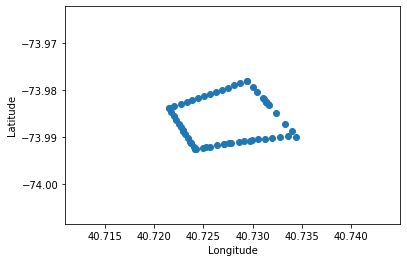

In [6]:
#Call nta_graph function with the desired NTA
nta_graph('MN22')

In [7]:
#Import shapely for polygons visualization
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [8]:
#Create a dictionary with nta as key and its polygon as value
nta_dictionary_lat_lon = {}
for nta in nta_dictionary.keys():
    polygon = []
    for lat,lon in zip(nta_dictionary[nta][0],nta_dictionary[nta][1]):
        lat_lon_tuple = (lat,lon)
        polygon.append(lat_lon_tuple)
        nta_dictionary_lat_lon[nta] = polygon

In [9]:
#Read Uber trips 2014 from csv file
uber_trips_2014 = pd.read_csv('uber_trips_2014.csv')

In [10]:
uber_trips_2014.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512


In [11]:
%%time
#Map every pickup point in every polygon to know where it fits
nta_serie = []
idx_dic = {}
for i in range(uber_trips_2014.shape[0]//10):
    point = Point(uber_trips_2014['pickup_latitude'][i],uber_trips_2014['pickup_longitude'][i])
    for j in nta_dictionary_lat_lon.keys():
        polygon = Polygon(nta_dictionary_lat_lon[j])
        if polygon.contains(point):
            idx_dic[i] = j
        else:
            pass

UsageError: Line magic function `%%time` not found.


In [ ]:
#Create deep copy of Uber dataframe
df_test = uber_trips_2014.copy()

In [ ]:
#Add nta column
df_test['Nta'] = pd.Series(idx_dic)

In [ ]:
#Save the csv file
df_test.to_csv('uber_nta.csv')